In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

from myFunctions import install_packages, save_table 
install_packages()
from tabulate import tabulate
import pandas as pd
import numpy as np
import warnings
import re
import matplotlib.pyplot as plt
import seaborn as sns



from statsmodels.tsa.stattools import adfuller


warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)


Installing required packages: ['numpy', 'pandas', 'scikit-learn', 'joblib', 'pyarrow', 'fastparquet', 'plotly', 'matplotlib', 'seaborn', 'MetaTrader5', 'tabulate', 'optuna', 'torch', 'tqdm', 'shap', 'kaleido', 'statsmodels', 're']
numpy is already installed.
pandas is already installed.
scikit-learn is already installed.
joblib is already installed.
pyarrow is already installed.
fastparquet is already installed.
plotly is already installed.
matplotlib is already installed.
seaborn is already installed.
MetaTrader5 is already installed.
tabulate is already installed.
optuna is already installed.
torch is already installed.
tqdm is already installed.
shap is already installed.
kaleido is already installed.
statsmodels is already installed.
Installing re...
Error installing re: Command '['c:\\Users\\guitz\\anaconda3\\envs\\pytorch_env\\python.exe', '-m', 'pip', 'install', 're']' returned non-zero exit status 1.
All packages are verified.


In [6]:

### folders 
input_dir = os.path.join('..', 'data', 'processed')


In [7]:
df_timestamp_path = os.path.join(input_dir, 'df_timestamp.parquet').replace("/", "\\")

In [12]:
df_timestamp = pd.read_parquet(df_timestamp_path)

# Colunas y definidas
y_cols = ['close_BGI$']

# Padrão regex para x_cols
x_cols_pattern = re.compile(r'^(close_).*')

# Filtrar colunas que correspondem ao padrão e não estão em y_cols
x_cols = [
    col for col in df_timestamp.columns
    if x_cols_pattern.match(col) and col not in y_cols
]


In [13]:
df_timestamp.head()

,time,open_AGFS,high_AGFS,low_AGFS,close_AGFS,tick_volume_AGFS,spread_AGFS,real_volume_AGFS,open_BGI$,high_BGI$,low_BGI$,close_BGI$,tick_volume_BGI$,spread_BGI$,real_volume_BGI$,open_CCM$,high_CCM$,low_CCM$,close_CCM$,tick_volume_CCM$,spread_CCM$,real_volume_CCM$,open_DI1$,high_DI1$,low_DI1$,close_DI1$,tick_volume_DI1$,spread_DI1$,real_volume_DI1$,open_DOL$,high_DOL$,low_DOL$,close_DOL$,tick_volume_DOL$,spread_DOL$,real_volume_DOL$,open_GOLD11,high_GOLD11,low_GOLD11,close_GOLD11,tick_volume_GOLD11,spread_GOLD11,real_volume_GOLD11,open_IBOV,high_IBOV,low_IBOV,close_IBOV,tick_volume_IBOV,spread_IBOV,real_volume_IBOV,open_ICF$,high_ICF$,low_ICF$,close_ICF$,tick_volume_ICF$,spread_ICF$,real_volume_ICF$,open_ICON,high_ICON,low_ICON,close_ICON,tick_volume_ICON,spread_ICON,real_volume_ICON,open_IFIX,high_IFIX,low_IFIX,close_IFIX,tick_volume_IFIX,spread_IFIX,real_volume_IFIX,open_IND$,high_IND$,low_IND$,close_IND$,tick_volume_IND$,spread_IND$,real_volume_IND$,open_IVVB11,high_IVVB11,low_IVVB11,close_IVVB11,tick_volume_IVVB11,spread_IVVB11,real_volume_IVVB11,OBV_IND$,OBV_DI1$,OBV_IVVB11,OBV_BGI$,OBV_ICF$,OBV_IFIX,OBV_AGFS,OBV_ICON,OBV_CCM$,OBV_GOLD11,OBV_IBOV,OBV_DOL$,RSI_IND$,RSI_DI1$,RSI_IVVB11,RSI_BGI$,RSI_ICF$,RSI_IFIX,RSI_AGFS,RSI_ICON,RSI_CCM$,RSI_GOLD11,RSI_IBOV,RSI_DOL$,ATR_IND$,ATR_DI1$,ATR_IVVB11,ATR_BGI$,ATR_ICF$,ATR_IFIX,ATR_AGFS,ATR_ICON,ATR_CCM$,ATR_GOLD11,ATR_IBOV,ATR_DOL$,VWAP_IND$,VWAP_DI1$,VWAP_IVVB11,VWAP_BGI$,VWAP_ICF$,VWAP_IFIX,VWAP_AGFS,VWAP_ICON,VWAP_CCM$,VWAP_GOLD11,VWAP_IBOV,VWAP_DOL$,EMA9_IND$,EMA21_IND$,EMA55_IND$,EMA9_DI1$,EMA21_DI1$,EMA55_DI1$,EMA9_IVVB11,EMA21_IVVB11,EMA55_IVVB11,EMA9_BGI$,EMA21_BGI$,EMA55_BGI$,EMA9_ICF$,EMA21_ICF$,EMA55_ICF$,EMA9_IFIX,EMA21_IFIX,EMA55_IFIX,EMA9_AGFS,EMA21_AGFS,EMA55_AGFS,EMA9_ICON,EMA21_ICON,EMA55_ICON,EMA9_CCM$,EMA21_CCM$,EMA55_CCM$,EMA9_GOLD11,EMA21_GOLD11,EMA55_GOLD11,EMA9_IBOV,EMA21_IBOV,EMA55_IBOV,EMA9_DOL$,EMA21_DOL$,EMA55_DOL$,close_price_target,open_price_target,behavior_target
0,2022-06-02 09:00:00,1767.0,1767.0,1763.0,1763.0,0.0,0.0,0.0,320.52,321.21,319.63,320.33,44.0,1.0,14.0,121.02,122.52,120.73,122.05,951.0,1.0,1191.0,11.686,11.736,11.664,11.727,734.0,1.0,13795.0,5576.135,5596.922,5573.825,5591.148,1390.0,1.0,8550.0,9.45,9.45,9.44,9.45,0.0,1.0,0.0,111611.0,111641.0,111360.0,111360.0,0.0,0.0,0.0,258.22,261.11,258.22,259.71,71.0,1.0,53.0,3459.0,3460.0,3451.0,3451.0,0.0,0.0,0.0,2824.0,2824.0,2822.0,2823.0,0.0,0.0,0.0,148369.0,148667.0,148039.0,148667.0,455.0,1.0,2600.0,216.55,216.89,216.25,216.25,0.0,1.0,0.0,3094.0,1247.0,836.0,-114.0,507.0,-37321.0,-21752.0,-94085.0,-1480.0,440.0,28905.0,3981.0,58.542320,71.794872,65.273312,46.527778,64.985163,33.333333,47.058824,33.333333,67.741935,57.142857,36.027944,54.917882,339.142857,0.024929,0.653571,1.477143,0.575000,1.428571,3.500000,7.500000,0.437143,0.014286,225.285714,10.682286,148032.449891,11.675408,215.381446,319.882910,257.207490,2824.592399,1762.840631,3461.030096,121.993298,9.400751,111511.716340,5567.677058,148085.938581,148077.614177,148046.687037,11.697140,11.685936,11.672844,216.192547,215.888976,215.465756,319.524544,319.734896,320.402912,258.340207,258.001906,256.919051,2823.216456,2823.789834,2824.676516,1764.053810,1763.757889,1761.870724,3454.360337,3457.188329,3458.328162,121.403192,121.543033,122.110865,9.447520,9.432993,9.380451,111438.765770,111480.083554,111455.854537,5597.257017,5589.642700,5564.905769,319.29,319.73,0
1,2022-06-02 09:15:00,1767.0,1767.0,1763.0,1763.0,0.0,0.0,0.0,319.73,319.73,319.29,319.29,4.0,1.0,4.0,122.10,122.76,121.94,122.39,389.0,1.0,586.0,11.727,11.758,11.713,11.731,1507.0,1.0,35500.0,5589.993,5593.458,5576.712,5580.754,881.0,1.0,5290.0,9.45,9.45,9.44,9.45,0.0,1.0,0.0,111611.0,111641.0,111360.0,111360.0,0.0,0.0,0.0,259.23,259.84,258.88,259.10,16.0,1.0,16.0,3459.0,3460.0,3451.0,3451.0,0.0,0.0,0.0,2824.0,2824.0,2822.0,2823.0,0.0,0.0,0.0,148693.0,148865.0,148475.0,148720.0,474.0,1.0,2480.0,216.55,216.89,216.25,216.25,0.0,1.0,0.0,3568.0,2754.0,836.0,-118.0,491.0,-37321.0,-217

In [14]:
df_close = df_timestamp[['time']+ y_cols+ x_cols]

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Definir o estilo do gráfico
sns.set(style="whitegrid")


# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Copiar o DataFrame e aplicar MinMaxScaler nas colunas de 'close'
df_scaled = df_close.copy()
for col in df_close.columns:
    if 'close' in col:
        df_scaled[col] = scaler.fit_transform(df_close[[col]])

# Definir as colunas para os gráficos

In [ ]:
df_scaled

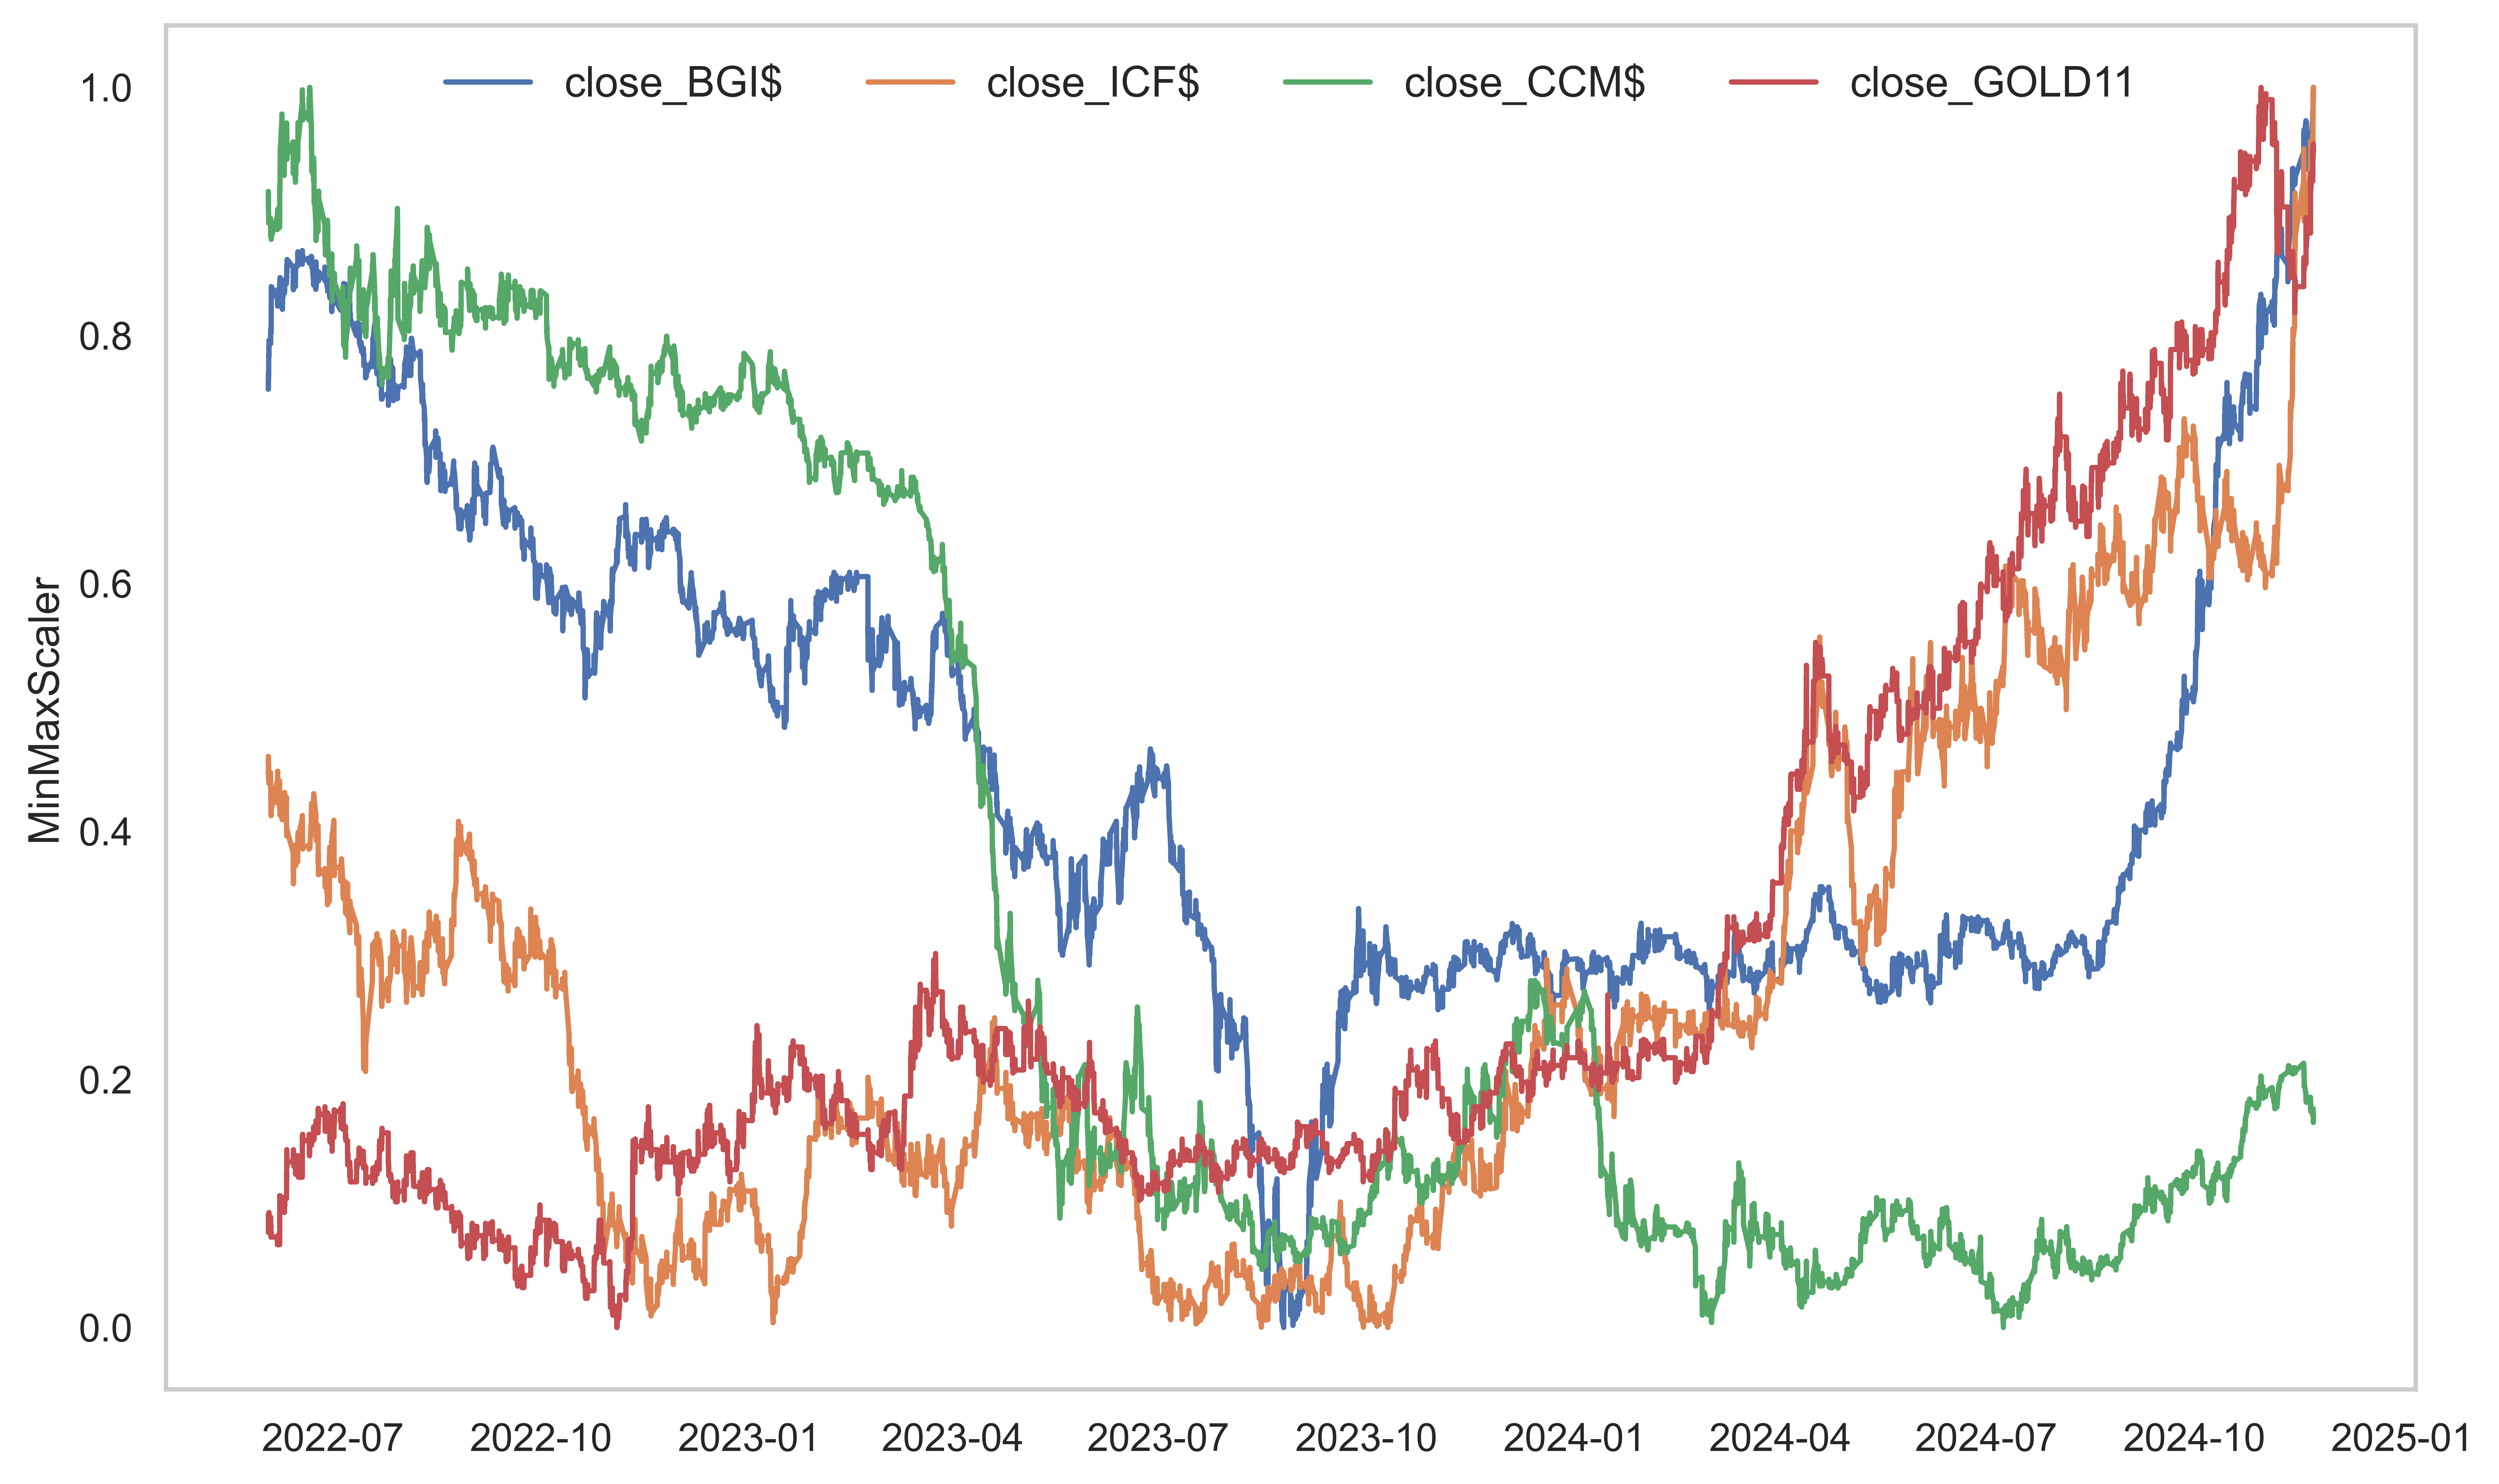

In [17]:
# Definir o estilo do gráfico
sns.set(style="whitegrid")

group_1_cols = ['close_BGI$', 'close_ICF$', 'close_CCM$', 'close_GOLD11']

# Gráfico para o grupo 1
plt.figure(figsize=(10, 6), dpi=900)  # Aumentando a resolução e o tamanho
for col in group_1_cols:
    plt.plot(df_scaled.time, df_scaled[col], label=col)

plt.ylabel('MinMaxScaler', fontsize=12)
plt.grid(False)
# Colocar a legenda na parte inferior
plt.legend(

    bbox_to_anchor=(0.5, 1),  # Posicionar abaixo
    loc='upper center',
    ncol=4,  # Distribuir em 4 colunas
    fontsize=12,
   
    frameon=False
)
plt.tight_layout()
plt.show()


In [22]:
def adfuller_test(df, critical_level='5%'):
    # Check if the critical level is valid
    if critical_level not in ['1%', '5%', '10%']:
        raise ValueError("The critical_level parameter must be one of: '1%', '5%', or '10%'")

    non_stationary = []  # List to store non-stationary variables
    result_df = pd.DataFrame(columns=['Variable', 'ADF Statistic', 'p-value', '1%', '5%', '10%', 'res'])

    # Loop through each column (variable)
    for col in df.columns:
        result = adfuller(df[col].values)
        adf_stat = result[0]
        p_value = result[1]
        critical_vals = result[4]

        # Compare the ADF statistic with the selected critical value
        is_stationary = 1 if adf_stat < critical_vals[critical_level] else 0

        # Append to the non_stationary list if not stationary
        if is_stationary == 0:
            non_stationary.append(col)
        
        # Collect results for each variable
        row = {
            'Variable': col,
            'ADF Statistic': adf_stat,
            'p-value': p_value,
            '1%': critical_vals['1%'],
            '5%': critical_vals['5%'],
            '10%': critical_vals['10%'],
            'res': is_stationary  # 1 for Stationary, 0 for Non-Stationary
        }
        print(row)
        # Append row to result_df
        result_df = pd.concat([result_df, pd.DataFrame([row])], ignore_index=True)

    # Return non_stationary variables and result_df
    return non_stationary, result_df

In [38]:
def make_stationary(df: pd.DataFrame(), 
                    max_diffs: int = 5):
    """
    Make the given dataframe stationary by applying differencing.

    Args:
        df (pd.DataFrame): DataFrame containing time series data.
        max_diffs (int): Maximum number of differencing iterations to perform.

    Returns:
        pd.DataFrame: DataFrame with columns showing the stationarity status after each differencing iteration.
    """

    diff_df = df.copy()
    result_df = pd.DataFrame(index=df.columns)  # Start with columns as index for results
    stationary_set = set()
    diff_counts = {col: 0 for col in df.columns}  # Track number of differencing for each column

    for i in range(max_diffs):
        # Perform differencing only if it's not the first iteration
        if i != 0:
            diff_df = diff_df.diff()
            diff_df.dropna(inplace=True)
        
        non_stationary_cols, current_result_df = adfuller_test(diff_df)
        
        # Update stationary columns
        stationary_set.update([col for col in df.columns if col not in non_stationary_cols])
        
        # Track how many times each column needed differencing
        for col in df.columns:
            if col in stationary_set:
                diff_counts[col] = i  # Mark the number of differences for stationary columns

        # If all columns are stationary, break the loop
        if len(stationary_set) == len(df.columns):
            break
        
        # Only keep non-stationary columns for the next iteration
        diff_df = diff_df[non_stationary_cols]

    # Update result_df with diff_counts
    result_df['diff'] = result_df.index.map(diff_counts)
    
    return result_df


In [ ]:
df_scaled.set_index('time', inplace= True, drop=True)


KeyError: "None of ['time'] are in the columns"

In [33]:
non_stationary, result_df = adfuller_test(df_scaled)

{'Variable': 'close_BGI$', 'ADF Statistic': -0.08116715347524593, 'p-value': 0.9512823490494655, '1%': -3.4306431313040147, '5%': -2.861669554473233, '10%': -2.566838958177671, 'res': 0}
{'Variable': 'close_AGFS', 'ADF Statistic': -2.7625523511214327, 'p-value': 0.06382519388000094, '1%': -3.4306426066474365, '5%': -2.86166932260357, '10%': -2.566838834758029, 'res': 0}
{'Variable': 'close_CCM$', 'ADF Statistic': -1.6788950269055094, 'p-value': 0.44201787998518777, '1%': -3.430642816284535, '5%': -2.8616694152517668, '10%': -2.5668388840728333, 'res': 0}
{'Variable': 'close_DI1$', 'ADF Statistic': -0.7903958228026585, 'p-value': 0.8219269558240188, '1%': -3.4306431838731717, '5%': -2.861669577705938, '10%': -2.566838970543982, 'res': 0}
{'Variable': 'close_DOL$', 'ADF Statistic': -1.7978988044217294, 'p-value': 0.38150537677336194, '1%': -3.430642593555084, '5%': -2.861669316817462, '10%': -2.566838831678198, 'res': 0}
{'Variable': 'close_GOLD11', 'ADF Statistic': 1.1568537976862623, '

In [39]:
df_sta = make_stationary(df_scaled)

{'Variable': 'close_BGI$', 'ADF Statistic': -0.08116715347524593, 'p-value': 0.9512823490494655, '1%': -3.4306431313040147, '5%': -2.861669554473233, '10%': -2.566838958177671, 'res': 0}
{'Variable': 'close_AGFS', 'ADF Statistic': -2.7625523511214327, 'p-value': 0.06382519388000094, '1%': -3.4306426066474365, '5%': -2.86166932260357, '10%': -2.566838834758029, 'res': 0}
{'Variable': 'close_CCM$', 'ADF Statistic': -1.6788950269055094, 'p-value': 0.44201787998518777, '1%': -3.430642816284535, '5%': -2.8616694152517668, '10%': -2.5668388840728333, 'res': 0}
{'Variable': 'close_DI1$', 'ADF Statistic': -0.7903958228026585, 'p-value': 0.8219269558240188, '1%': -3.4306431838731717, '5%': -2.861669577705938, '10%': -2.566838970543982, 'res': 0}
{'Variable': 'close_DOL$', 'ADF Statistic': -1.7978988044217294, 'p-value': 0.38150537677336194, '1%': -3.430642593555084, '5%': -2.861669316817462, '10%': -2.566838831678198, 'res': 0}
{'Variable': 'close_GOLD11', 'ADF Statistic': 1.1568537976862623, '

In [40]:
df_sta

,diff
close_BGI$,1
close_AGFS,1
close_CCM$,1
close_DI1$,1
close_DOL$,1
close_GOLD11,1
close_IBOV,1
close_ICF$,1
close_ICON,1
close_IFIX,1


In [41]:
result_df

,Variable,ADF Statistic,p-value,1%,5%,10%,res
0,close_BGI$,-0.081167,0.951282,-3.430643,-2.861670,-2.566839,0
1,close_AGFS,-2.762552,0.063825,-3.430643,-2.861669,-2.566839,0
2,close_CCM$,-1.678895,0.442018,-3.430643,-2.861669,-2.566839,0
3,close_DI1$,-0.790396,0.821927,-3.430643,-2.861670,-2.566839,0
4,close_DOL$,-1.797899,0.381505,-3.430643,-2.861669,-2.566839,0
5,close_GOLD11,1.156854,0.995674,-3.430643,-2.861670,-2.566839,0
6,close_IBOV,-1.382900,0.590446,-3.430643,-2.861669,-2.566839,0
7,close_ICF$,1.102227,0.995236,-3.430643,-2.861669,-2.566839,0
8,close_ICON,-2.508108,0.113514,-3.430643,-2.861669,-2.566839,0
9,close_IFIX,-1.230717,0.660245,-3.430643,-2.861670,-2.566839,0


In [42]:
save_table(result_df,title='Teste de estacionariedade para preço de fechamento na primeira diferença')

Table saved as CSV: ..\results\tables\csv\Tabela_4_Teste de estacionariedade para preço de fechamento na primeira diferença.csv


In [43]:
save_table(df_sta,title='Quantidade de diferenciações do preço de fechamento para estacionariedade ')

Table saved as CSV: ..\results\tables\csv\Tabela_5_Quantidade de diferenciações do preço de fechamento para estacionariedade .csv
